In [1]:
# EJERCICIO: 1

In [2]:
import os
os.environ['USE_PYGEOS'] = '0'

import geopandas as gpd
from  fiona import listlayers

# Mapa
BoliviaMapas='https://github.com/FabianRomero20/geodfprepro1.2/raw/main/maps/worldMaps.gpkg'

# Capas en el mapa
listlayers(BoliviaMapas)

['departments', 'cities', 'rivers']

In [3]:
# Recuperando cada mapa (capa):
departments=gpd.read_file(BoliviaMapas,layer='departments')
cities=gpd.read_file(BoliviaMapas,layer='cities')
rivers=gpd.read_file(BoliviaMapas,layer='rivers')

In [4]:
# Asegurándose de que tengan el mismo CRS:
departments.crs.to_epsg()==cities.crs.to_epsg()==rivers.crs.to_epsg()

True

In [5]:
# Observamos qué CRS tienen
departments.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
# País elegido (Bolivia)
Bolivia=gpd.read_file(os.path.join("maps","Departamentos","departamentos_geo.shp"))

Text(0.5, 1.0, 'Mapa del Bolivia')

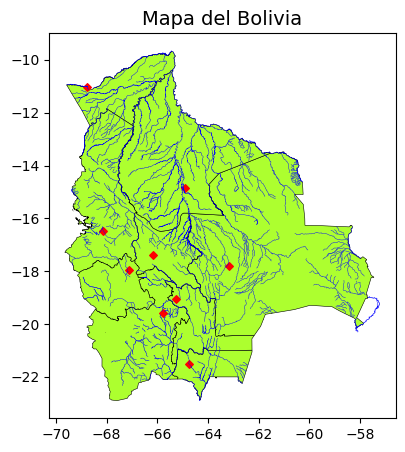

In [7]:
# Cargamos la capa del archivo geopackage
capaBolivia = gpd.read_file(BoliviaMapas)

# Plotting de subconjuntos de mapas de nuestro país elegido
baseMapa = Bolivia.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
cities.plot(marker='D', color='red', markersize=15,ax=baseMapa)
rivers.plot(edgecolor='blue', linewidth=0.3,ax=baseMapa)

# Agregamos título a nuestro mapa del país: "Bolivia"
baseMapa.set_title("Mapa del Bolivia", fontsize=14)

In [8]:
# Observamos el CRS de nuestro país (Bolivia)
Bolivia.crs

<Geographic 2D CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
# Cambiamos el CRS a uno más común (4326)
crs_común = 'EPSG:4326'
Bolivia.crs=crs_común

# Observamos el nuevo CRS de nuestro país
Bolivia.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
# Ahora, con el CRS común (4326), observamos que sus unidades están en "grados"
Bolivia.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [11]:
# Vemos los centroides de nuestro país en "grados"
Bolivia.centroid

C:\Users\INTEL\AppData\Local\Temp\ipykernel_9380\598967797.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  Bolivia.centroid


0    POINT (-65.63603 -17.23549)
1    POINT (-66.72488 -20.54977)
2    POINT (-63.87890 -21.59617)
3    POINT (-61.52178 -17.21449)
4    POINT (-67.32297 -11.09371)
5    POINT (-67.68817 -18.64090)
6    POINT (-64.27660 -20.04619)
7    POINT (-65.27255 -13.78423)
8    POINT (-68.10663 -15.21236)
dtype: geometry

In [12]:
# Obtenemos el centroide unificado de nuestro país
centroideBolivia = Bolivia.geometry.unary_union.centroid

# Luego, imprimimos las coordenadas del centroide obtenido
print(centroideBolivia.x, centroideBolivia.y)

-64.64508939234986 -16.717531247599613


In [13]:
# Uso de CRS común para proyecciones (3587)

# Vemos que la proyeccion "3587" tiene como unidad al "metro"
Bolivia.to_crs(3587).crs.axis_info

[Axis(name=Easting, abbrev=X, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=Y, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [14]:
# Proyectamos los centroides de nuestro país, pero ahora en "metros"
Bolivia.to_crs(3587).centroid

0     POINT (9370345.269 -7748370.476)
1     POINT (9314918.709 -8430432.196)
2     POINT (9892540.168 -8501263.956)
3    POINT (10097438.936 -7568165.253)
4     POINT (8838230.816 -6739515.924)
5     POINT (9060952.892 -8091573.267)
6     POINT (9744917.836 -8219233.851)
7     POINT (9287431.393 -7125310.473)
8     POINT (8859127.016 -7492397.085)
dtype: geometry

In [15]:
# Proyectamos las geometrías en la proyección EPSG 3587
BoliviaProyectado3587 = Bolivia.to_crs(3587)

# Obtenemos el centroide unificado del país proyectado con EPSG 3587
centroideBoliviaProyectado3587 = BoliviaProyectado3587.geometry.unary_union.centroid

# Imprimimos las coordenadas del centroide del país proyectado con EPSG 3587
print(centroideBoliviaProyectado3587.x, centroideBoliviaProyectado3587.y)

9542729.051493792 -7661675.251487627


<Axes: >

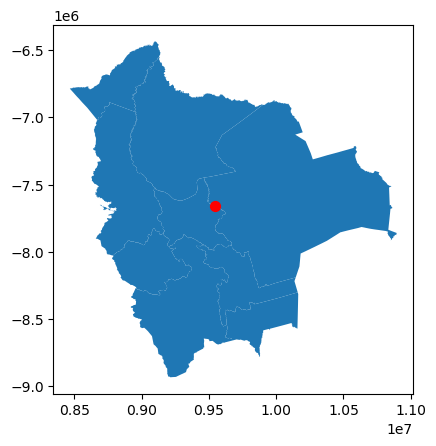

In [16]:
# Ploteamos esta versión proyectada con su centroide
baseBolivia3587 = Bolivia.to_crs(3587).plot()
gpd.GeoSeries([centroideBoliviaProyectado3587]).plot(color='red', ax=baseBolivia3587, markersize=50)

In [17]:
# Ahora, buscamos una proyeccion mucho más precisa, en el caso de Bolivia, la mejor proyeccion es la "32719"

# Recomendado para Bolivia en "metros"
Bolivia.to_crs(32719).crs.axis_info

[Axis(name=Easting, abbrev=E, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=N, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [18]:
# Proyectamos los centroides de nuestro país, ahora con EPSG 32719
Bolivia.to_crs(32719).centroid

0     POINT (857759.293 8091358.248)
1     POINT (737722.812 7726693.619)
2    POINT (1030903.829 7603019.656)
3    POINT (1297940.895 8081629.125)
4     POINT (683601.236 8773167.414)
5     POINT (638352.560 7938446.215)
6     POINT (994252.587 7776508.983)
7     POINT (903586.822 8473417.732)
8     POINT (596037.907 8319222.766)
dtype: geometry

In [19]:
# Proyectamos las geometrías en la proyección EPSG 32719
BoliviaProyectado32719 = Bolivia.to_crs(32719)

# Obtenemos el centroide unificado del país proyectado con EPSG 32719
centroideBoliviaProyectado32719 = BoliviaProyectado32719.geometry.unary_union.centroid

# Imprimimos las coordenadas del centroide del país proyectado con EPSG 32719
print(centroideBoliviaProyectado32719.x, centroideBoliviaProyectado32719.y)

965628.7899211094 8148705.704224363


<Axes: >

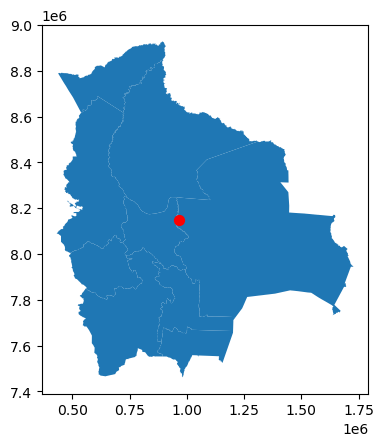

In [20]:
# Ploteamos esta versión proyectada, con EPSG 32719, y su centroide
baseBolivia32719 = Bolivia.to_crs(32719).plot()
gpd.GeoSeries([centroideBoliviaProyectado32719]).plot(color='red', ax=baseBolivia32719, markersize=50)

<Axes: title={'center': 'unprojected'}>

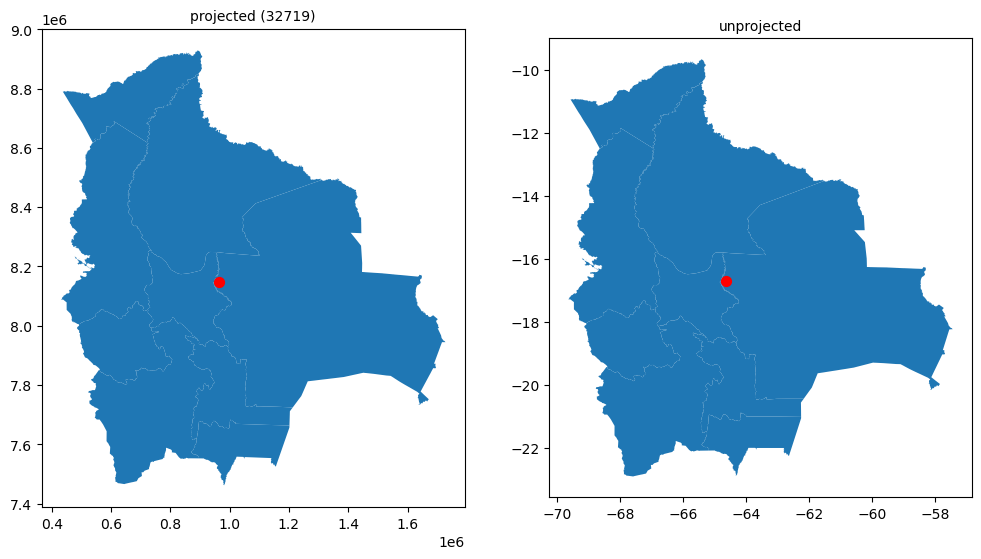

In [21]:
from matplotlib import pyplot

fig, (ax1, ax2) = pyplot.subplots(ncols=2, sharex=False, sharey=False, figsize=(12,12))

ax1.set_title('projected (32719)',fontsize=10)
Bolivia.to_crs(32719).plot(ax=ax1)
gpd.GeoSeries([centroideBoliviaProyectado32719]).plot(color='red', ax=ax1, markersize=50)

ax2.set_title('unprojected',fontsize=10)
Bolivia.plot(ax=ax2)
gpd.GeoSeries([centroideBolivia]).plot(color='red', ax=ax2, markersize=50)

In [22]:
# Mantenemos la versión proyectada para todos nuestros mapas (con los listlayers)

# Solo Bolivia
Bolivia_32719 = Bolivia.to_crs(32719)

cities_32719=cities.to_crs(Bolivia_32719.crs)

rivers_32719=rivers.to_crs(Bolivia_32719.crs)

In [23]:
# Guardamos el nuevo mapa de Bolivia proyectado

import os

Bolivia_32719.to_file(os.path.join("maps","BoliviaMaps_32719.gpkg"), layer='departments', driver="GPKG")
cities_32719.to_file(os.path.join("maps","BoliviaMaps_32719.gpkg"), layer='cities', driver="GPKG")
rivers_32719.to_file(os.path.join("maps","BoliviaMaps_32719.gpkg"), layer='rivers', driver="GPKG")


In [24]:
################################################################################################################################
################################################################################################################################
################################################################################################################################

In [25]:
# EJERCICIO: 2

In [26]:
Bolivia_32719

,id,c_ut,DEPARTAMEN,geometry
0,0,03,Cochabamba,"POLYGON ((838887.390 8005816.874, 838815.550 8..."
1,1,05,Potosí,"POLYGON ((744650.953 7954858.056, 744650.952 7..."
2,2,06,Tarija,"POLYGON ((907457.421 7552664.883, 898447.968 7..."
3,3,07,Santa Cruz,"POLYGON ((1709560.542 7974471.511, 1711188.161..."
4,4,09,Pando,"POLYGON ((499814.741 8783000.850, 499884.288 8..."
5,5,04,Oruro,"POLYGON ((595395.606 7834704.995, 595353.699 7..."
6,6,01,Chuquisaca,"POLYGON ((1033917.928 7668856.024, 1021436.024..."
7,7,08,Beni,"POLYGON ((983703.923 8245202.850, 957979.338 8..."
8,8,02,La Paz,"MULTIPOLYGON (((585864.023 8047844.286, 585840..."


In [27]:
Bolivia_32719.boundary

0    LINESTRING (838887.390 8005816.874, 838815.550...
1    MULTILINESTRING ((744650.953 7954858.056, 7446...
2    LINESTRING (907457.421 7552664.883, 898447.968...
3    LINESTRING (1709560.542 7974471.511, 1711188.1...
4    MULTILINESTRING ((499814.741 8783000.850, 4998...
5    LINESTRING (595395.606 7834704.995, 595353.699...
6    LINESTRING (1033917.928 7668856.024, 1021436.0...
7    LINESTRING (983703.923 8245202.850, 957979.338...
8    MULTILINESTRING ((585864.023 8047844.286, 5858...
dtype: geometry

<Axes: >

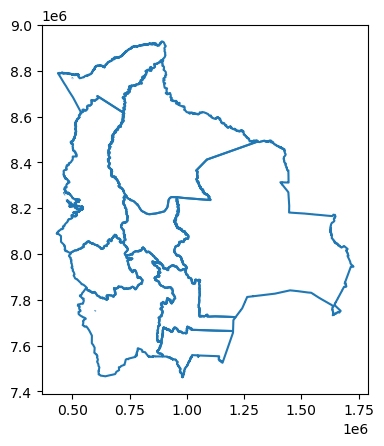

In [28]:
Bolivia_32719.boundary.plot()

<Axes: >

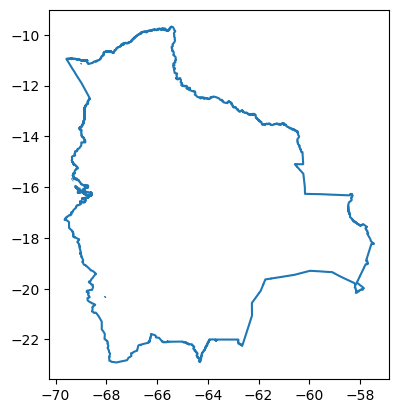

In [29]:
# Cargar el archivo shapefile de los departamentos de Bolivia
Bolivia_departments=gpd.read_file(os.path.join("maps","Departamentos","departamentos_geo.shp"))

# Disolver los polígonos de todos los departamentos en uno solo
Bolivia_boundary = Bolivia_departments.unary_union

# Crear un nuevo GeoDataFrame con el límite de Bolivia
Bolivia_contorno = gpd.GeoDataFrame(geometry=[Bolivia_boundary])

# Graficar el límite de Bolivia
Bolivia_contorno.boundary.plot()

In [30]:
type(Bolivia_contorno.boundary)

geopandas.geoseries.GeoSeries

In [31]:
# converting into GDF
Bolivia_contorno.boundary.to_frame()

,0
0,"MULTILINESTRING ((-68.77190 -16.36937, -68.771..."


In [32]:
# conversion
Bolivia_contornoDF=Bolivia_contorno.boundary.to_frame() 

# new column (optional)
Bolivia_contornoDF['name']='Bolivia' 

# renaming the geometry column
Bolivia_contornoDF.rename(columns={0:'geometry'},inplace=True) 

#setting the geometry (the name is not enough)
Bolivia_contornoDF = Bolivia_contornoDF.set_geometry("geometry")

# verifying:
Bolivia_contornoDF.crs

In [33]:
# Arriba, no nos da el CRS

# Cambiamos el CRS a uno más común (32719)
crs_proyectado = 'EPSG:32719'
Bolivia_contornoDF.crs=crs_proyectado
Bolivia_contornoDF.crs

<Projected CRS: EPSG:32719>
Name: WGS 84 / UTM zone 19S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°W and 66°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Chile. Colombia. Peru.
- bounds: (-72.0, -80.0, -66.0, 0.0)
Coordinate Operation:
- name: UTM zone 19S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [34]:
Bolivia_contornoDF

,geometry,name
0,"MULTILINESTRING ((-68.772 -16.369, -68.772 -16...",Bolivia


In [35]:
Bolivia_contornoDF.to_file(os.path.join("maps","BoliviaMaps_32719.gpkg"), layer='border', driver="GPKG")

In [36]:
################################################################################################################################
################################################################################################################################
################################################################################################################################

In [37]:
# EJERCICIO: 3

In [39]:
# Agregamos dos nuevos shapefiles, uno de limites distritales y otro de limites provinciales
Bolivia_Municipios = gpd.read_file(os.path.join("maps","Municipios","municipio_geo.shp"))
Bolivia_Provincias = gpd.read_file(os.path.join("maps","Provincias","provincias_geo.shp"))

In [40]:
Bolivia_Municipios.crs, Bolivia_Provincias.crs

(<Geographic 2D CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - lon[east]: Longitude (Degree)
 - lat[north]: Latitude (Degree)
 Area of Use:
 - undefined
 Datum: World Geodetic System 1984
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - lon[east]: Longitude (Degree)
 - lat[north]: Latitude (Degree)
 Area of Use:
 - undefined
 Datum: World Geodetic System 1984
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

<Axes: >

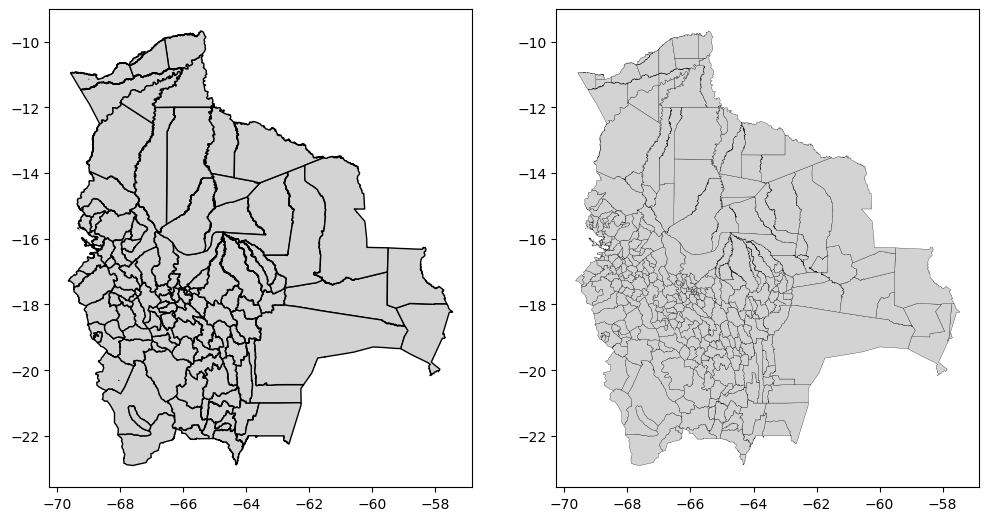

In [41]:
fig, (ax1, ax2) = pyplot.subplots(ncols=2, sharex=False, sharey=False, figsize=(12,12))

Bolivia_Provincias.plot(ax=ax1, facecolor='lightgrey', edgecolor='black')
Bolivia_Municipios.plot(ax=ax2, facecolor='lightgrey', edgecolor='black',linewidth=0.2)

In [45]:
#Cambiamos a CRS con proyeccion

Bolivia_Provincias_32719=Bolivia_Provincias.to_crs(32719)
Bolivia_Municipios_32719=Bolivia_Municipios.to_crs(32719)

In [49]:
Bolivia_Provincias_32719.to_file(os.path.join("maps","BoliviaMaps_32719.gpkg"), layer='provincias', driver="GPKG")
Bolivia_Municipios_32719.to_file(os.path.join("maps","BoliviaMaps_32719.gpkg"), layer='municipios', driver="GPKG")

In [50]:
################################################################################################################################
################################################################################################################################
################################################################################################################################

In [51]:
# EJERCICIO: 4

<Axes: title={'center': 'Below_Centroid, RightOf_Centroid'}>

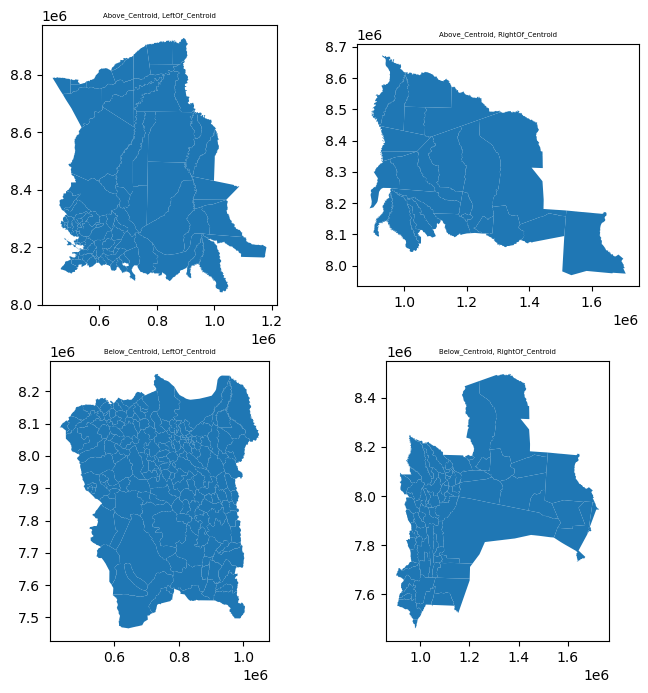

In [53]:
centroBolivia=centroideBoliviaProyectado32719.centroid


fig, axs = pyplot.subplots(nrows=2,ncols=2,sharex=False, sharey=False,figsize=(8,8))

axs[0,0].set_title('Above_Centroid, LeftOf_Centroid',fontsize=5)
Bolivia_Municipios_32719.cx[:centroBolivia.x,centroBolivia.y:].plot(ax=axs[0,0]) 

axs[0,1].set_title('Above_Centroid, RightOf_Centroid',fontsize=5)
Bolivia_Municipios_32719.cx[centroBolivia.x:,centroBolivia.y:].plot(ax=axs[0,1]) 

axs[1,0].set_title('Below_Centroid, LeftOf_Centroid',fontsize=5)
Bolivia_Municipios_32719.cx[:centroBolivia.x,:centroBolivia.y].plot(ax=axs[1,0]) 

axs[1,1].set_title('Below_Centroid, RightOf_Centroid',fontsize=5)
Bolivia_Municipios_32719.cx[centroBolivia.x:,:centroBolivia.y].plot(ax=axs[1,1]) 


In [54]:
Bolivia_Municipios_32719.cx[:centroBolivia.x,centroBolivia.y:]

,id,c_ut,DEPARTAMEN,PROVINCIA,MUNICIPIO,CAPITAL,geometry
23,23,020905,La Paz,Loayza,Cairoma,Cairoma,"POLYGON ((660233.890 8161805.497, 660708.200 8..."
36,36,020202,La Paz,Omasuyos,Villa Ancoraimes,Villa Ancoraimes,"POLYGON ((518697.197 8258267.328, 518788.478 8..."
37,37,020403,La Paz,Camacho,Puerto Mayor de Carabuco,Carabuco,"POLYGON ((507607.356 8282345.851, 507734.356 8..."
39,39,080601,Beni,Marbán,Loreto,Loreto,"POLYGON ((956740.232 8332789.388, 956751.897 8..."
45,45,020402,La Paz,Camacho,Mocomoco,Mocomoco,"POLYGON ((483541.598 8311930.467, 483640.596 8..."
...,...,...,...,...,...,...,...
309,309,020401,La Paz,Camacho,Puerto Acosta,Puerto Acosta,"MULTIPOLYGON (((469016.020 8259094.653, 468998..."
310,310,020405,La Paz,Camacho,Escoma,Escoma,"POLYGON ((487371.560 8274008.979, 487663.556 8..."
312,312,020201,La Paz,Omasuyos,Achacachi,Achacachi,"POLYGON ((531407.660 8246673.779, 531714.941 8..."
313,313,020807,La Paz,Ingavi,Taraco,Taraco,"MULTIPOLYGON (((521177.514 8184164.162, 521203..."


In [56]:
# you create
Bolivia_topLeft=Bolivia_Municipios_32719.cx[:centroBolivia.x,centroBolivia.y:].dissolve()
# you get
Bolivia_topLeft

,geometry,id,c_ut,DEPARTAMEN,PROVINCIA,MUNICIPIO,CAPITAL
0,"MULTIPOLYGON (((1102399.472 8235800.099, 11024...",23,020905,La Paz,Loayza,Cairoma,Cairoma


In [58]:
Bolivia_topLeft['zone']='NW'
Bolivia_topLeft=Bolivia_topLeft.loc[:,['DEPARTAMEN','zone','geometry']]   
Bolivia_topLeft

,DEPARTAMEN,zone,geometry
0,La Paz,NW,"MULTIPOLYGON (((1102399.472 8235800.099, 11024..."


<Axes: >

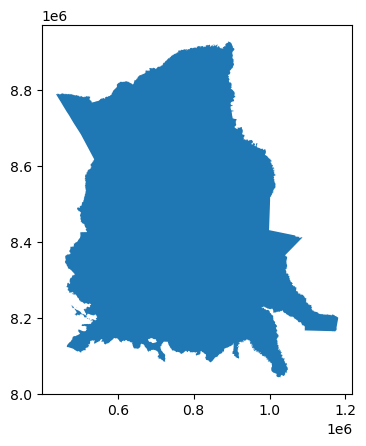

In [59]:
Bolivia_topLeft.plot()

In [60]:
rowsCX=(Bolivia_Municipios_32719.cx[:centroBolivia.x,centroBolivia.y:].shape[0],\
Bolivia_Municipios_32719.cx[centroBolivia.x:,centroBolivia.y:].shape[0],\
Bolivia_Municipios_32719.cx[:centroBolivia.x,:centroBolivia.y].shape[0],\
Bolivia_Municipios_32719.cx[centroBolivia.x:,:centroBolivia.y].shape[0])
sum(rowsCX)

392

In [61]:
sum(rowsCX)-Bolivia_Municipios_32719.shape[0]

53

In [62]:
################################################################################################################################
################################################################################################################################
################################################################################################################################

In [63]:
# EJERCICIO: 5

In [64]:
import pandas as pd 

infoairports=pd.read_csv(os.path.join("data","bo-airports.csv"))

# some rows

infoairports.iloc[[0,1,2,3,-4,-3,-2,-1],:] #head and tail


,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,#meta +id,#meta +code,#loc +airport +type,#loc +airport +name,#geo +lat,#geo +lon,#geo +elevation +ft,#region +continent +code,#country +name,#country +code +iso2,...,#loc +municipality +name,#status +scheduled,#loc +airport +code +gps,#loc +airport +code +iata,#loc +airport +code +local,#meta +url +airport,#meta +url +wikipedia,#meta +keywords,#meta +score,#date +updated
1,6184,SLLP,medium_airport,El Alto International Airport,-16.5132999420166,-68.19229888916016,13355,SA,Bolivia,BO,...,La Paz / El Alto,1,SLLP,LPB,NaN,NaN,https://en.wikipedia.org/wiki/El_Alto_Internat...,NaN,750,2008-07-14T12:56:12+00:00
2,6193,SLVR,large_airport,Viru Viru International Airport,-17.6448,-63.135399,1224,SA,Bolivia,BO,...,Santa Cruz,1,SLVR,VVI,NaN,NaN,https://en.wikipedia.org/wiki/Viru_Viru_Intern...,NaN,1050,2019-01-13T13:52:47+00:00
3,6180,SLCB,medium_airport,Jorge Wilsterman International Airport,-17.421100616455078,-66.1771011352539,8360,SA,Bolivia,BO,...,Cochabamba,1,SLCB,CBB,NaN,NaN,https://en.wikipedia.org/wiki/Jorge_Wilsterman...,NaN,750,2008-07-14T12:56:12+00:00
199,39550,SLTY,small_airport,Tiguipa Airport,-13.800000190734863,-66.23332977294922,722,SA,Bolivia,BO,...,Yacuma,0,SLTY,NaN,NaN,NaN,NaN,NaN,50,2008-07-15T08:00:47+00:00
200,429704,BO-0017,heliport,Culpina K Heliport,-21.26314,-67.22413,NaN,SA,Bolivia,BO,...,Culpina K,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-09-03T08:26:05+00:00
201,308773,SLHT,heliport,Transierra Helipuerto,-21.3385,-63.479,1486,SA,Bolivia,BO,...,Transierra Natural Gas Co.,0,SLHT,NaN,NaN,NaN,NaN,NaN,0,2013-05-26T14:40:36+00:00
202,429703,BO-0016,heliport,Villa Alota Heliport,-21.40185,-67.59456,NaN,SA,Bolivia,BO,...,Villa Alota,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-09-03T08:23:56+00:00


In [65]:
# Eliminamos la primera fila

infoairports.drop(index=0,inplace=True)
infoairports.reset_index(drop=True, inplace=True)
infoairports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,6184,SLLP,medium_airport,El Alto International Airport,-16.5132999420166,-68.19229888916016,13355,SA,Bolivia,BO,...,La Paz / El Alto,1,SLLP,LPB,NaN,NaN,https://en.wikipedia.org/wiki/El_Alto_Internat...,NaN,750,2008-07-14T12:56:12+00:00
1,6193,SLVR,large_airport,Viru Viru International Airport,-17.6448,-63.135399,1224,SA,Bolivia,BO,...,Santa Cruz,1,SLVR,VVI,NaN,NaN,https://en.wikipedia.org/wiki/Viru_Viru_Intern...,NaN,1050,2019-01-13T13:52:47+00:00
2,6180,SLCB,medium_airport,Jorge Wilsterman International Airport,-17.421100616455078,-66.1771011352539,8360,SA,Bolivia,BO,...,Cochabamba,1,SLCB,CBB,NaN,NaN,https://en.wikipedia.org/wiki/Jorge_Wilsterman...,NaN,750,2008-07-14T12:56:12+00:00
3,6189,SLSU,medium_airport,Juana Azurduy De Padilla Airport,-19.007099,-65.288696,9540,SA,Bolivia,BO,...,Sucre,0,SLSU,NaN,NaN,NaN,https://en.wikipedia.org/wiki/Juana_Azurduy_de...,military,750,2020-02-09T15:04:10+00:00
4,6183,SLET,medium_airport,El Trompillo Airport,-17.8115997314,-63.1715011597,1371,SA,Bolivia,BO,...,Santa Cruz,1,SLET,SRZ,NaN,NaN,https://en.wikipedia.org/wiki/El_Trompillo_Air...,NaN,750,2012-01-28T13:03:47+00:00


In [66]:
# Mantenemos las columnas necesarias
infoairports.columns.to_list()

['id',
 'ident',
 'type',
 'name',
 'latitude_deg',
 'longitude_deg',
 'elevation_ft',
 'continent',
 'country_name',
 'iso_country',
 'region_name',
 'iso_region',
 'local_region',
 'municipality',
 'scheduled_service',
 'gps_code',
 'iata_code',
 'local_code',
 'home_link',
 'wikipedia_link',
 'keywords',
 'score',
 'last_updated']

In [70]:
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
infoairports=infoairports.loc[:,keep]

In [71]:
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           202 non-null    object 
 1   type           202 non-null    object 
 2   latitude_deg   202 non-null    float64
 3   longitude_deg  202 non-null    float64
 4   elevation_ft   196 non-null    float64
 5   region_name    202 non-null    object 
 6   municipality   199 non-null    object 
dtypes: float64(3), object(4)
memory usage: 11.2+ KB


In [72]:
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
infoairports[numericCols]=infoairports.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

In [73]:
# now 
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           202 non-null    object 
 1   type           202 non-null    object 
 2   latitude_deg   202 non-null    float64
 3   longitude_deg  202 non-null    float64
 4   elevation_ft   196 non-null    float64
 5   region_name    202 non-null    object 
 6   municipality   199 non-null    object 
dtypes: float64(3), object(4)
memory usage: 11.2+ KB


<Axes: xlabel='longitude_deg', ylabel='latitude_deg'>

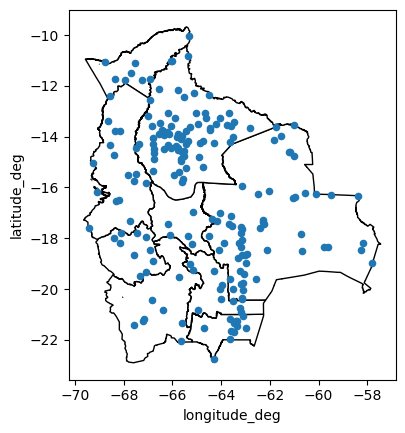

In [74]:
# let's plot

base = Bolivia.plot(color='white', edgecolor='black') #unprojected

infoairports.plot.scatter(x = 'longitude_deg', y = 'latitude_deg',ax=base)


In [75]:
#convertimos esas coordenadas en serie de puntos
airportsBolivia = gpd.GeoDataFrame(data=infoairports.copy(), 
                                   geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                   infoairports.latitude_deg), crs=Bolivia.crs.to_epsg())

<Axes: >

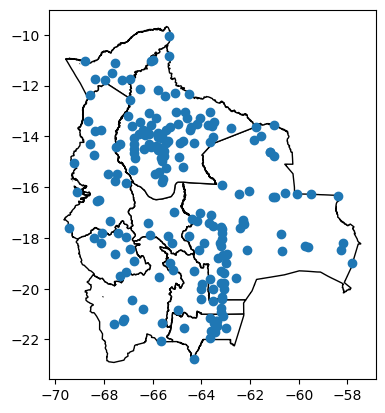

In [76]:
base = Bolivia.plot(color='white', edgecolor='black')
airportsBolivia.plot(ax=base)

In [77]:
#remember:
type(airportsBolivia), type(infoairports)

(geopandas.geodataframe.GeoDataFrame, pandas.core.frame.DataFrame)

<Axes: >

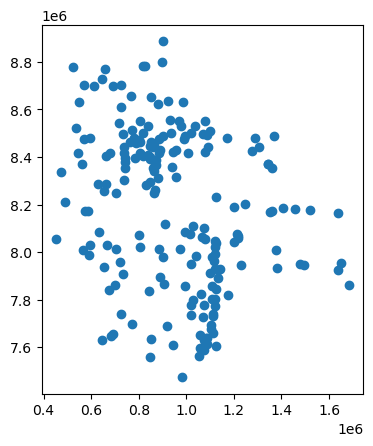

In [78]:
airportsBolivia.to_crs(32719).plot()

In [79]:
infoairports.to_crs(32719).plot()

AttributeError: 'DataFrame' object has no attribute 'to_crs'

In [80]:
airportsBolivia_32719 = airportsBolivia.to_crs(32719)

In [81]:
airportsBolivia_32719['type'].value_counts()

type
small_airport     181
medium_airport     16
heliport            3
large_airport       1
closed              1
Name: count, dtype: int64

In [82]:
airportsBolivia_32719.rename(columns={'type':'kind'},inplace=True)

In [83]:
from folium import LayerControl


m = airportsBolivia_32719[airportsBolivia_32719.kind=='small_airport'].explore(color="red",name="small",show=False)
m = airportsBolivia_32719[airportsBolivia_32719.kind=='medium_airport'].explore(m=m, color="blue",name="medium",show=False)
m = airportsBolivia_32719[airportsBolivia_32719.kind=='large_airport'].explore(m=m, color="black",name="large",show=True)
m = airportsBolivia_32719[airportsBolivia_32719.kind=='heliport'].explore(m=m, color="orange",name="heliport",show=False)
m = airportsBolivia_32719[airportsBolivia_32719.kind=='closed'].explore(m=m, color="white",name="closed",show=False)

LayerControl(collapsed=False).add_to(m) #optional

m

In [84]:
airportsBolivia_32719.to_file(os.path.join("maps","BoliviaMaps_32719.gpkg"),layer='airports', driver="GPKG")

In [85]:
################################################################################################################################
################################################################################################################################
################################################################################################################################

In [86]:
# EJERCICIO: 6